# Explore here

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import requests
import seaborn as sns

# load the .env file variables
load_dotenv()



True

In [ ]:
#request a la api de last.fm
API_KEY = "dc39873a3c98dfae9357e37041088a9b"
url = "http://ws.audioscrobbler.com/2.0/"

params = {
    "method": "chart.gettoptracks",
    "api_key": API_KEY,
    "format": "json",
    "limit": 10
}

response = requests.get(url, params=params)
print(response.status_code)
data = response.json()

200


In [ ]:
tracks = data["tracks"]["track"]
tracks[0]

{'name': 'HELICOPTER',
 'duration': '160',
 'playcount': '1091625',
 'listeners': '288048',
 'mbid': '1add4052-879f-49ce-9961-8f095c800c61',
 'url': 'https://www.last.fm/music/A$AP+Rocky/_/HELICOPTER',
 'streamable': {'#text': '0', 'fulltrack': '0'},
 'artist': {'name': 'A$AP Rocky',
  'mbid': '25b7b584-d952-4662-a8b9-dd8cdfbfeb64',
  'url': 'https://www.last.fm/music/A$AP+Rocky'},
 'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
   'size': 'small'},
  {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
   'size': 'medium'},
  {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
   'size': 'large'},
  {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
   'size': 'extralarge'}]}

In [4]:
#conversión a df
rows = []
for t in tracks:
    rows.append({
        "track": t["name"],
        "artist": t["artist"]["name"],
        "playcount": int(t["playcount"]),
        "listeners": int(t["listeners"])
    })
df = pd.DataFrame(rows)
df

,track,artist,playcount,listeners
0,HELICOPTER,A$AP Rocky,1091625,288048
1,End of Beginning,Djo,30200082,1848614
2,Order of Protection,A$AP Rocky,554119,250115
3,Stateside + Zara Larsson,PinkPantheress,5150156,476961
4,STOLE YA FLOW,A$AP Rocky,696847,235228
5,STAY HERE 4 LIFE,A$AP Rocky,598290,218038
6,Fame Is a Gun,Addison Rae,14551010,824166
7,Playa,A$AP Rocky,505238,208044
8,Punk Rocky,A$AP Rocky,1349550,284209
9,Interrogation (Skit),A$AP Rocky,403401,200838


In [5]:
#orden por popularidad
df_sorted = df.sort_values("playcount", ascending=True)

In [6]:
df_sorted.head(3)

,track,artist,playcount,listeners
9,Interrogation (Skit),A$AP Rocky,403401,200838
7,Playa,A$AP Rocky,505238,208044
2,Order of Protection,A$AP Rocky,554119,250115


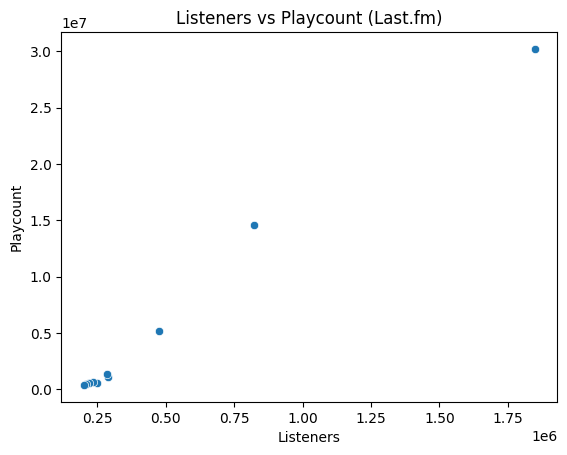

In [8]:
sns.scatterplot(data=df, x="listeners", y="playcount")
plt.xlabel("Listeners")
plt.ylabel("Playcount")
plt.title("Listeners vs Playcount (Last.fm)")
plt.show()